<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week07_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

1. Agus Prayogi (2141720025)

2. Diah Putri Nofianti (2141720054)

[JOBSHEET](https://drive.google.com/file/d/1Ff4thY1rCYH3vRLMRe0xJHRErgQKiPCc/view)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import os

# Praktikum Konvolusi tanpa Library

Buatlah fungsi konvolusi menggunakan algoritma tanpa menggunakan library atau metode konvolusi dari OpenCV.

*`Catatan` parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.*

Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra

In [36]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

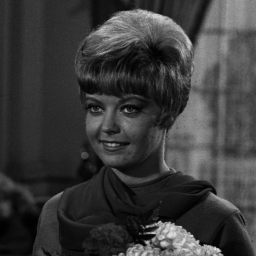

In [37]:
img = cv.imread(f"{path}/Minggu 3/female.tiff")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

## Average Filter

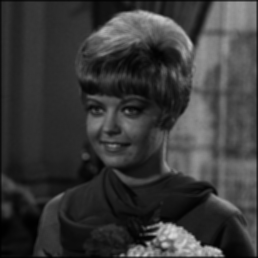

In [38]:
kernel_avg = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

cv2_imshow(convolution2d(img_gray, kernel_avg, 1, 2))

## Low Pass Filter

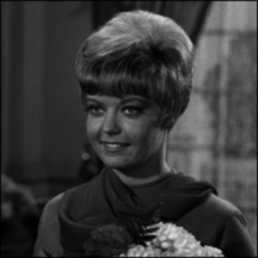

In [39]:
kernel_low = np.array([[1,1,1],[1,4,1],[1,1,1]])/12

cv2_imshow(convolution2d(img_gray, kernel_low, 1, 2))

## High Pass Filter

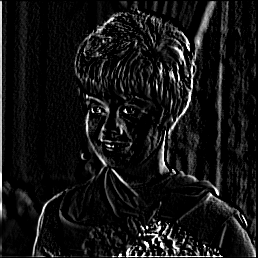

In [40]:
kernel_high = np.array([[-1,0,1],[-1,0,3],[-3,0,1]])

cv2_imshow(convolution2d(img_gray, kernel_high, 1, 2))

## Sharpen

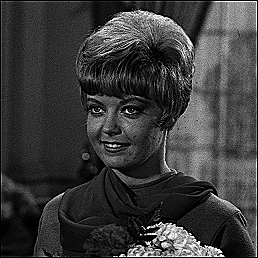

In [41]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

## Emboss

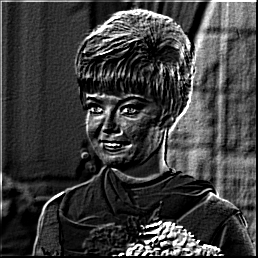

In [42]:
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

## Left Sobel Edge Detection

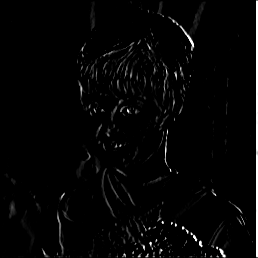

In [43]:
kernel_lsed = np.array([[1,0,-1],[2,0,-2],[1,0,-2]])

cv2_imshow(convolution2d(img_gray, kernel_lsed, 1, 2))

## Canny Edge Detection

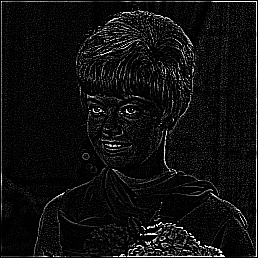

In [44]:
kernel_ced = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_ced, 1, 2))

## Prewitt Edge Detection

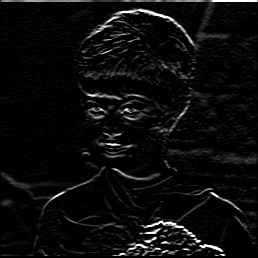

In [45]:
kernel_ped = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_ped, 1, 2))

## 5x5 Gaussian Blur

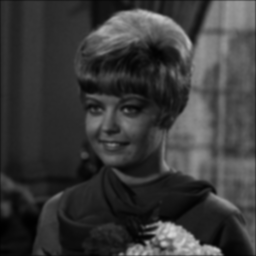

In [46]:
kernel_gauss5 = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256

cv2_imshow(convolution2d(img_gray, kernel_gauss5, 1, 2))

## 21x21 Gaussian Blur

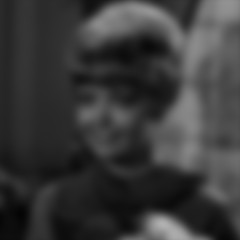

In [47]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
kernel_gaussian = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss21 = kernel_gaussian @ kernel_gaussian.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss21, 1, 2))

# Tugas

Diketahui [dataset KTP](https://drive.google.com/drive/folders/1auQKTV5xIbEtGAWZL-h8GEhRJ0YNpSGI) dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga `histogram equalization` dan operasi aritmatika sebagai teknik pendukung perbaikan citra KTP.

In [48]:
def adjust_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

In [49]:
sharpen_kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

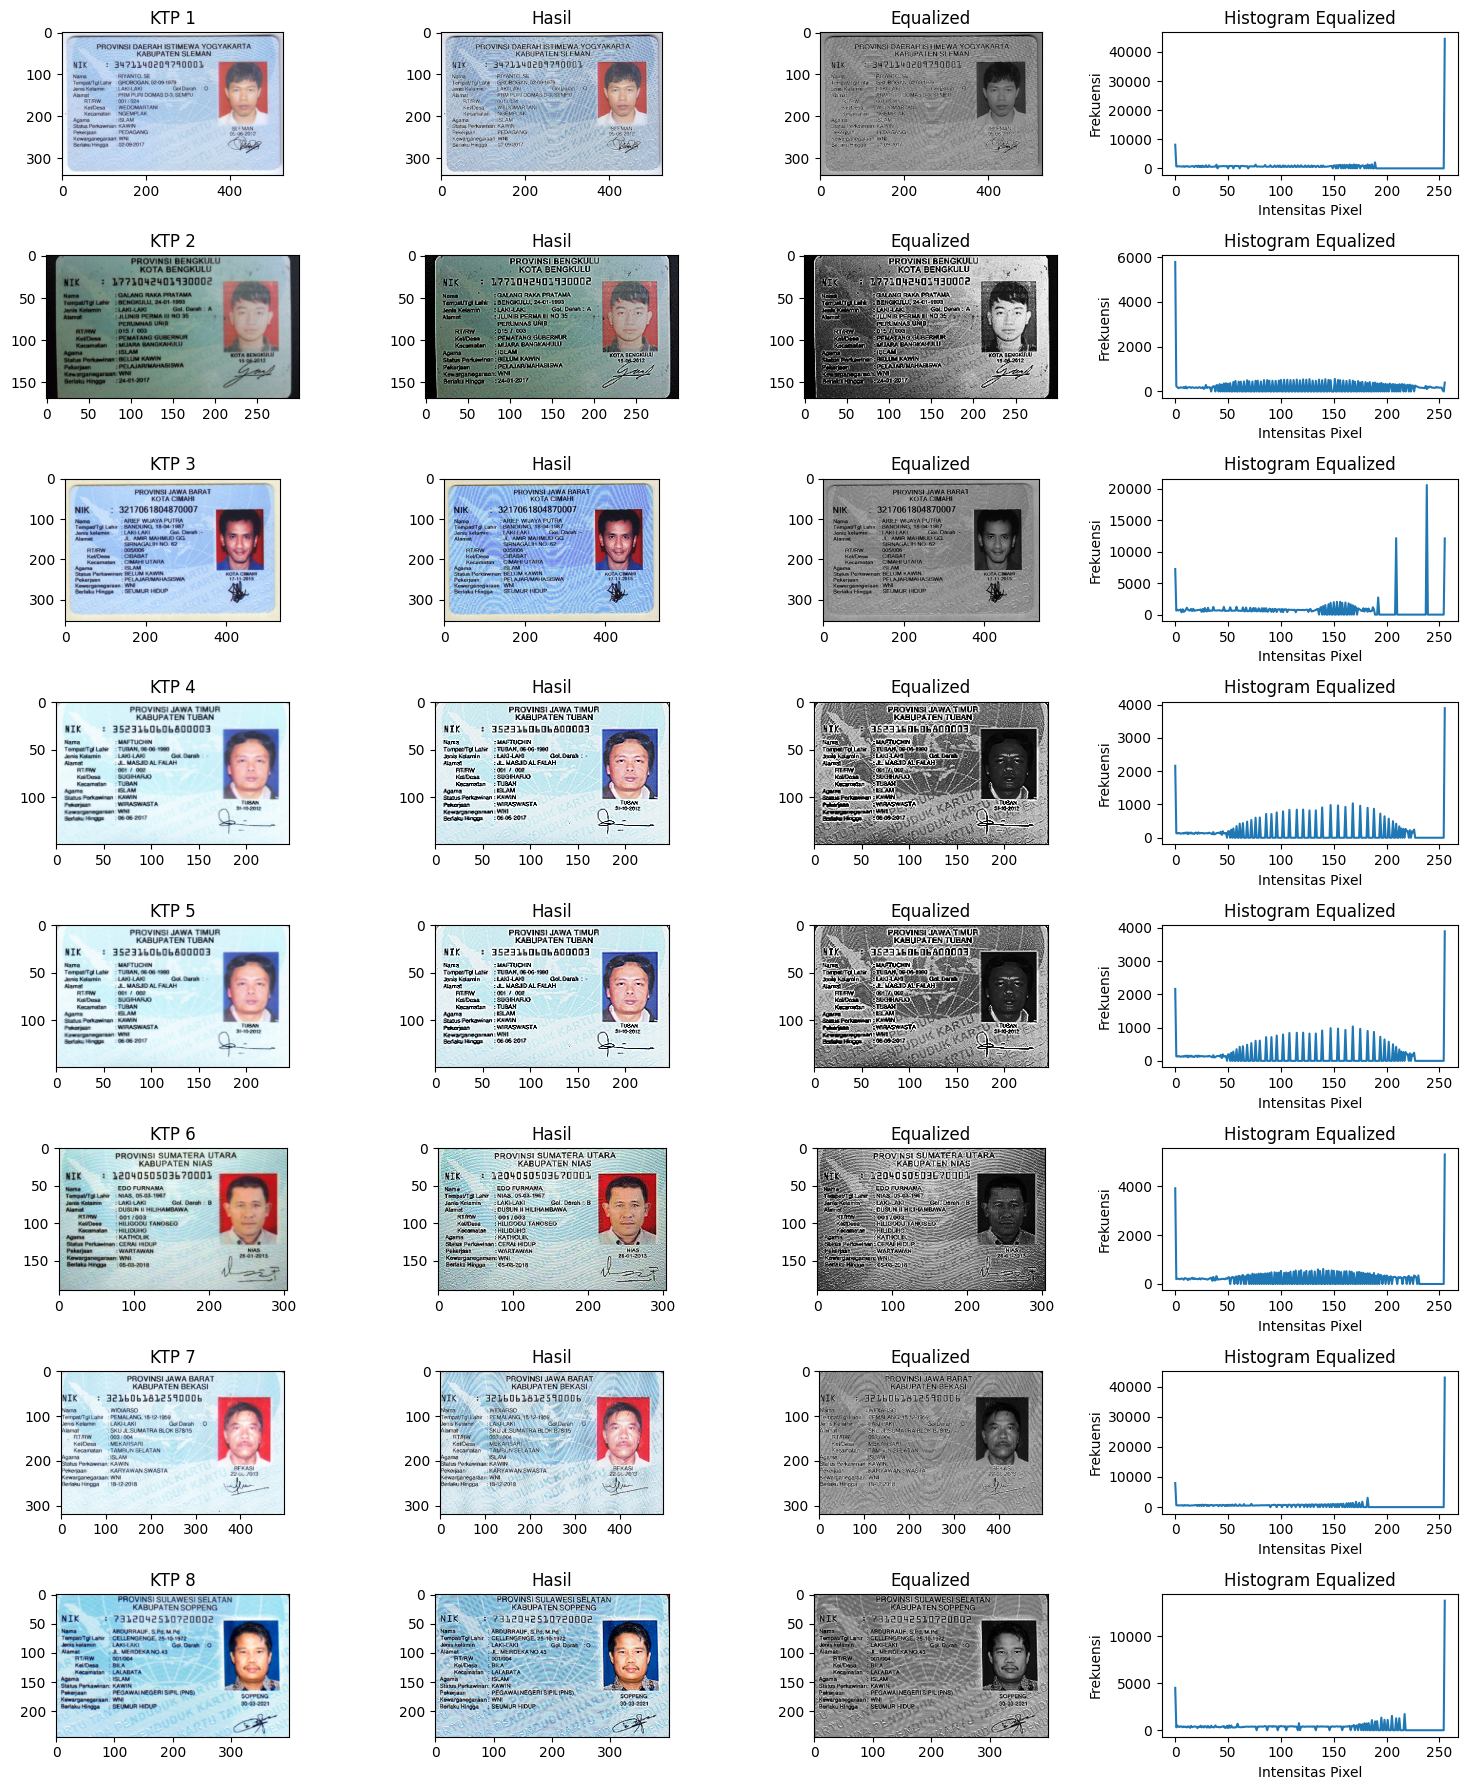

In [51]:
ktp = [file for file in os.listdir(f'{path}/KTP_More') if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_rows = len(ktp)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

for i, ktp_file in enumerate(ktp):
    ktp_path = os.path.join(f'{path}/KTP_More', ktp_file)
    ktp_image = cv.imread(ktp_path)

    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)
    brightness_adjusted = adjust_brightness(ktp_image_resized, -10)
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(sharpened_gray)
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP {i+1}')

    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil')

    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized')

    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized')
    axs[i, 3].set_xlabel('Intensitas Pixel')
    axs[i, 3].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()